# classification model 

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
import winsound
import seaborn as sns

In [64]:
%%time
loan = pd.read_csv('accepted_2007_to_2018Q4.csv',low_memory=False)

Wall time: 1min 5s


In [65]:
loan.shape


(2260701, 151)

In [66]:
[i for i in loan.columns if loan[i].nunique() == loan.shape[0]]

['id']

In [67]:
loan = loan.drop('id',axis=1)

In [68]:
half_missing_columns = [i for i in loan.columns if loan[i].isnull().mean() > .5]

In [69]:
loan  = loan.drop(half_missing_columns,axis=1)

In [70]:
data = loan.copy()

In [71]:
keep_list = ['addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code']
print("Keep features: ", len(keep_list))

Keep features:  30


In [72]:
data['loan_amnt'] = data['loan_amnt'].astype(float)

In [73]:
data = loan[keep_list]

In [74]:
data.shape

(2260701, 30)

In [75]:
data = data.drop(['emp_title','title'],axis=1)

In [76]:
data = data.drop(['grade','sub_grade',],axis=1)

In [77]:
data.shape

(2260701, 26)

<AxesSubplot:>

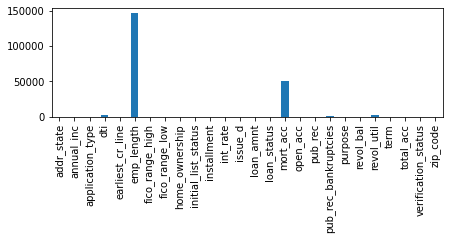

In [78]:
plt.figure(figsize=(7,2),dpi=72)
data.isnull().sum().plot(kind='bar')

In [79]:
data[[i for i in data.columns if data[i].dtype == 'float64']].head()

,annual_inc,dti,fico_range_high,fico_range_low,installment,int_rate,loan_amnt,mort_acc,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
0,55000.0,5.91,679.0,675.0,123.03,13.99,3600.0,1.0,7.0,0.0,0.0,2765.0,29.7,13.0
1,65000.0,16.06,719.0,715.0,820.28,11.99,24700.0,4.0,22.0,0.0,0.0,21470.0,19.2,38.0
2,63000.0,10.78,699.0,695.0,432.66,10.78,20000.0,5.0,6.0,0.0,0.0,7869.0,56.2,18.0
3,110000.0,17.06,789.0,785.0,829.90,14.85,35000.0,1.0,13.0,0.0,0.0,7802.0,11.6,17.0
4,104433.0,25.37,699.0,695.0,289.91,22.45,10400.0,6.0,12.0,0.0,0.0,21929.0,64.5,35.0


In [80]:
data[[i for i in data.columns if data[i].dtype == 'object']].head()

,addr_state,application_type,earliest_cr_line,emp_length,home_ownership,initial_list_status,issue_d,loan_status,purpose,term,verification_status,zip_code
0,PA,Individual,Aug-2003,10+ years,MORTGAGE,w,Dec-2015,Fully Paid,debt_consolidation,36 months,Not Verified,190xx
1,SD,Individual,Dec-1999,10+ years,MORTGAGE,w,Dec-2015,Fully Paid,small_business,36 months,Not Verified,577xx
2,IL,Joint App,Aug-2000,10+ years,MORTGAGE,w,Dec-2015,Fully Paid,home_improvement,60 months,Not Verified,605xx
3,NJ,Individual,Sep-2008,10+ years,MORTGAGE,w,Dec-2015,Current,debt_consolidation,60 months,Source Verified,076xx
4,PA,Individual,Jun-1998,3 years,MORTGAGE,w,Dec-2015,Fully Paid,major_purchase,60 months,Source Verified,174xx


In [81]:
for i in [i for i in data.columns if data[i].dtype == 'object']:
    print(i)

addr_state
application_type
earliest_cr_line
emp_length
home_ownership
initial_list_status
issue_d
loan_status
purpose
term
verification_status
zip_code


In [82]:
data['term'].unique()

array([' 36 months', ' 60 months', nan], dtype=object)

In [83]:
data['earliest_cr_line'] = data['earliest_cr_line'].fillna('Jan-2000')
data['earliest_cr_line'].astype(str).apply(lambda x:x.split('-'))

data['earliest_cr_line_month'] = data['earliest_cr_line'].astype(str).apply(lambda x:x.split('-')[0])
data['earliest_cr_line_year'] = data['earliest_cr_line'].astype(str).apply(lambda x:int(x.split('-')[1]))

data = data.drop('earliest_cr_line',axis=1)

In [84]:
data['emp_length'] = data['emp_length'].fillna('0 years')

def emp_length(x):
    if x == '10+ years':
        return 10
    if x == '< 1 year' :
        return 1
    else:
        return x.split()[0]

data['emp_length'] = data['emp_length'].astype(str).apply(lambda x:int(emp_length(x)))

In [85]:
data['term'] = data['term'].fillna('36 months')
data['term'] = data['term'].astype(str).apply(lambda x:int(x.split()[0]))
data['term']

0          36
1          36
2          60
3          60
4          60
           ..
2260696    60
2260697    60
2260698    60
2260699    36
2260700    36
Name: term, Length: 2260701, dtype: int64

In [86]:
data[[i for i in data.columns if data[i].dtype == 'object']] =  data[[i for i in data.columns if data[i].dtype == 'object']].fillna('NA')

In [87]:
data = data[data['loan_status'].isin(['Fully Paid','Charged Off'])]

<AxesSubplot:>

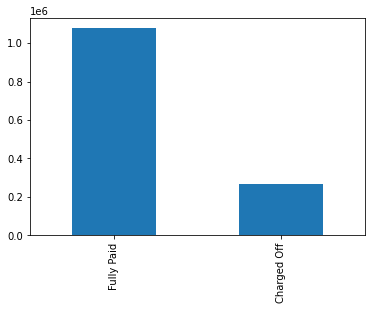

In [88]:
data['loan_status'].value_counts().plot(kind='bar')

In [89]:
y = pd.get_dummies(data['loan_status'])['Fully Paid']

#data = data.drop('loan_status',axis=1)

In [90]:
from sklearn.preprocessing import LabelEncoder


data[[i for i in data.columns if data[i].dtype == 'object']] = data[[i for i in data.columns if data[i].dtype == 'object']].astype(str).apply(lambda x:LabelEncoder().fit_transform(x))

In [91]:
data.to_csv('label_encoded_data.csv',index=False)

In [92]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


imputer  = IterativeImputer()
imputer.fit(data)

IterativeImputer()

In [93]:
x = imputer.fit_transform(data)

In [94]:
from imblearn.over_sampling import SMOTE

In [95]:
resample = SMOTE()

new_x,new_y = resample.fit_resample(x,y)

KeyboardInterrupt: 

In [ ]:
data.shape

In [ ]:
x.shape

In [ ]:
pd.concat([pd.DataFrame(new_x),pd.DataFrame(new_y)],axis=1).to_csv("clean_frame",index=False)

In [ ]:
import pandas as pd
new_data = pd.read_csv('clean_frame.csv')
new_x = new_data.drop('Fully Paid',axis=1)
new_y = new_data['Fully Paid']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()

scale.fit(new_x)
new_x = scale.fit_transform(new_x)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test = train_test_split(new_x,new_y)

In [ ]:
%%time

def time():
    return "-"

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score, precision_score, recall_score

print(time(),"everything imported successfully")



logreg = LogisticRegression(max_iter=1000)
svm = SVC(kernel='linear',cache_size=7000000)
tree = DecisionTreeClassifier()
forest = RandomForestClassifier(100)

print(time(),"created objects for classifiers successfully")

#logreg.fit(x_train,y_train)
#print(time(),"logisitc regression fit successful")

svm.fit(x_train[0::100],y_train[0::100])
print(time(),"SVM fit successful")

'''
tree.fit(x_train,y_train)
print(time(),"Tree fit successful")

forest.fit(x_train[0::5],y_train[0::5])
print(time(),"forest fit successful")


logreg_pred = logreg.predict(x_test)
#
tree_pred = tree.predict(x_test)
forest_pred = forest.predict(x_test)

print("predictions are stores into variables.")
'''

import winsound

winsound.Beep(2000,2000)

In [ ]:
print(balanced_accuracy_score(logreg_pred,y_test))
print(f1_score(logreg_pred,y_test))
print(roc_auc_score(logreg_pred,y_test))
print(precision_score(logreg_pred,y_test))
print(recall_score(logreg_pred,y_test))

In [ ]:
svm_pred = svm.predict(x_test)
print(balanced_accuracy_score(svm_pred,y_test))
print(f1_score(svm_pred,y_test))
print(roc_auc_score(svm_pred,y_test))
print(precision_score(svm_pred,y_test))
print(recall_score(svm_pred,y_test))

In [ ]:
print(balanced_accuracy_score(tree_pred,y_test))
print(f1_score(tree_pred,y_test))
print(roc_auc_score(tree_pred,y_test))
print(precision_score(tree_pred,y_test))
print(recall_score(tree_pred,y_test))

In [ ]:
print(balanced_accuracy_score(forest_pred,y_test))
print(f1_score(forest_pred,y_test))
print(roc_auc_score(forest_pred,y_test))
print(precision_score(forest_pred,y_test))
print(recall_score(forest_pred,y_test))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()

model.add(Dense(x_train.shape[1],activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,batch_size=2048,validation_data=(x_test,y_test),epochs=100,verbose=1)




In [ ]:
model.summary()

In [ ]:
pred = model.predict(x_test)

In [ ]:
import numpy as np
kaali = np.zeros(pred.shape)
accs = []

for i in range(pred.shape[0]):
    if pred[i][0] <= .5:
        kaali[i][0] = 0
    else:
        kaali[i][0] = 1


print(balanced_accuracy_score(kaali,y_test))
print(f1_score(kaali,y_test))
print(roc_auc_score(kaali,y_test))
print(precision_score(kaali,y_test))
print(recall_score(kaali,y_test))
    
import winsound

winsound.Beep(2000,2000)


In [ ]:
regx = data.drop(['loan_amnt'],axis=1)
regy = data['loan_amnt']

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(regx,regy)

reg_pred = reg.predict(regx)

from sklearn.metrics import r2_score

r2_score(reg_pred,regy)




In [ ]:
del(model)